## Análise Exploratória da AdventureWorks

Para poder explorar e até fazer as suas prórpias modificações, [clique aqui e baixe a planilha utilizada.](https://docs.google.com/spreadsheets/d/1bsob1iQpmXOtSxrlS-TUCeP_g-gmYaK-/edit?usp=sharing&ouid=113976041470917170981&rtpof=true&sd=true)

In [ ]:
# Importando as nossas bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from babel.numbers import format_currency

plt.style.use("seaborn")

In [ ]:
# Faça o Upload do arquivo
from google.colab import files
arq = files.upload()

In [19]:
# Criando o meu Primeiro Dataframe
df = pd.read_excel("AdventureWorks.xlsx")

In [ ]:
# Visualizando as primeiras linhas
df.head()

In [ ]:
# Quantas linhas e colunas temos?
df.shape

In [ ]:
# Quais os tipos de dados das nossa colunas?
df.dtypes

In [ ]:
# Qual a receita total?
receita_total = df["Valor Venda"].sum()

# Definindo o formato para o Real Brasileiro
receita_total = format_currency(receita_total, 'BRL', locale='pt_BR')

print(receita_total)

In [ ]:
# Qual o custo Total ?
df["Custo"] = df["Custo Unitário"].mul(df["Quantidade"]) # Criando uma nova coluna de custo

custo_total = round(df["Custo"].sum(), 2) # Calcula o nosso custo total

# Define a localização para o formato de moeda em Português do Brasil. Nesta
# análise, estou colocando a empresa no Brasil
custo_total = format_currency(custo_total, 'BRL', locale='pt_BR')

print(custo_total)

In [30]:
# Tendo em mãos a receita, o custo e o total, podemos explorar também o Lucro Total
# Para isso vou criar uma coluna de Lucro que será Receita - Custo
df["Lucro"] = df["Valor Venda"] - df["Custo"]

In [ ]:
# Verificando se deu certo a criação da nova coluna:
df.head(1)

In [ ]:
# Calculando o Lucro total:
lucro_total = round(df["Lucro"].sum(), 2)

# Definindo o formato para o Real Brasileiro
lucro_total = format_currency(lucro_total, 'BRL', locale='pt_BR')

# Imprime o lucro formatado
print(lucro_total)

In [52]:
# Criando uma coluna para mostrar o total de dias que levou para que o produto 
# fosse enviado
df["Tempo_envio"] = df["Data Envio"] - df["Data Venda"]

In [ ]:
# Verificando se deu certo a criação da nova coluna:
df.head(1)

### Tempo de envio para cada Marca
Para conseguir responder a essa pergunta, transformei a coluna Tempo_envio em numérica!

In [54]:
# Extraindo apenas os dias
df["Tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [ ]:
# Verificando se a extração deu certo
df.head(1)

In [ ]:
# Verificando que tipo de coluna é a Tempo_envio
df["Tempo_envio"].dtype

In [60]:
# Calculo da Média de tempo de envio por Marca
df.groupby("Marca")["Tempo_envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_envio, dtype: float64

### Lidando com os Missing Values


In [ ]:
# Verificando se temos dados faltantes
df.isnull().sum()

### - Lucro por Ano e por Marca

In [65]:
# Formatação de exibição para valores de ponto flutuante (float)
pd.options.display.float_format = '{:20,.2f}'.format

In [ ]:
# Criando agrupamento por ano e marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

In [ ]:
# Resetando o index
lucro_por_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()

# Aplicando formatação personalizada à coluna "Lucro"
lucro_por_ano["Lucro"] = lucro_por_ano["Lucro"].apply(lambda x: format_currency(x, 'BRL', locale='pt_BR'))

# Exibindo o resultado
lucro_por_ano

In [ ]:
# Gráfico do Lucro por Ano
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar(title="Lucro X Ano")
plt.xlabel("Ano")
plt.ylabel("Receita")

In [ ]:
# Análise dos números mostrados no gráfico
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum()

### - Explorando os produtos vendidos e o lucro


In [130]:
# Qual o total de produtos vendidos?
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

Text(0, 0.5, 'Produto')

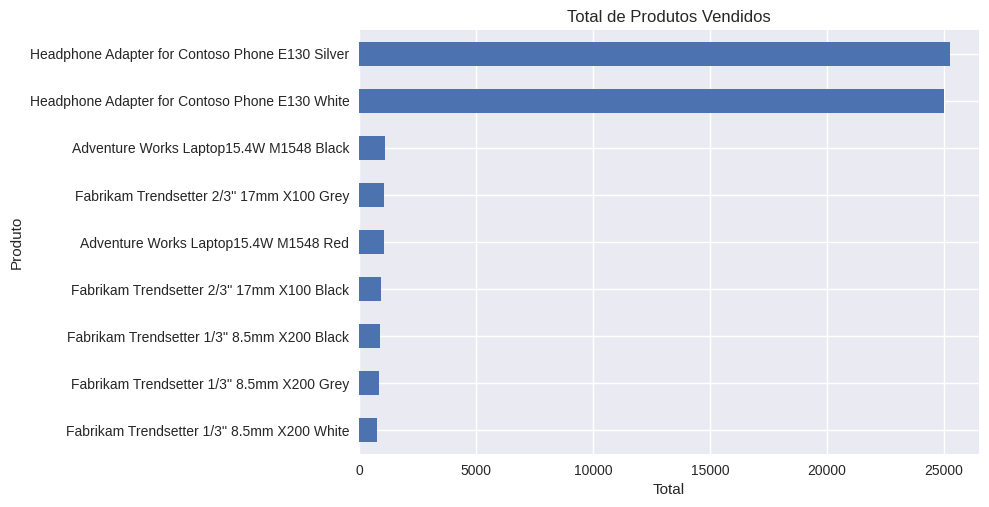

In [131]:
# Gráfico com o Total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total de Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto")

#### Vendas - 2008

In [132]:
# Selecionando as vendas por ano (Troque pelo ano que você quiser)
df_2008 = df[df["Data Venda"].dt.year == 2008]

In [133]:
df_2008.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",5
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",6
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",6
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",7


Text(0, 0.5, 'Lucro')

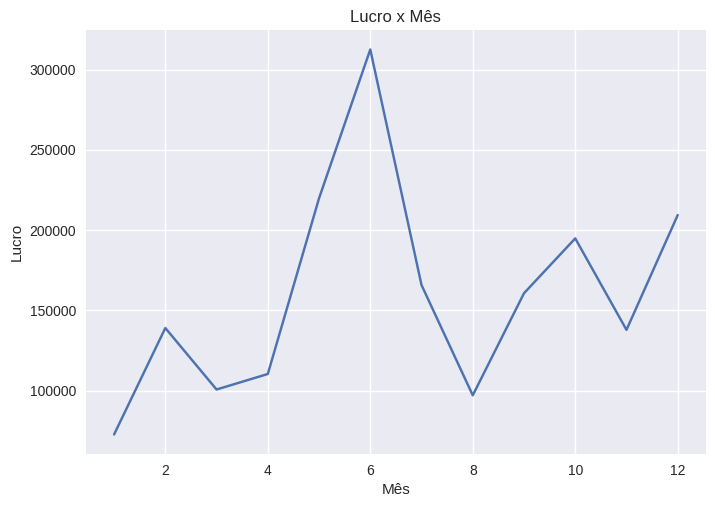

In [134]:
# Criando gráfico com o lucro por mês do ano selecionado
df_2008.groupby(df_2008["Data Venda"].dt.month)["Lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro")

(array([0, 1, 2]),
 [Text(0, 0, 'Adventure Works'),
  Text(1, 0, 'Contoso'),
  Text(2, 0, 'Fabrikam')])

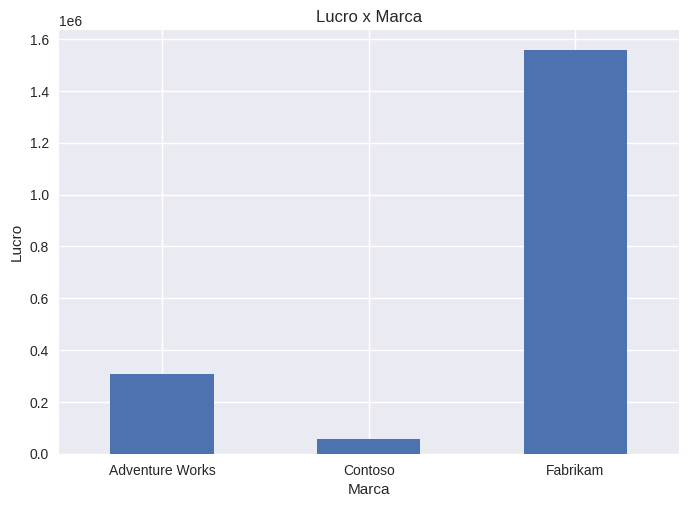

In [135]:
# Criando gráfico com o lucro por Marca
df_2008.groupby("Marca")["Lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal")

(array([0, 1]), [Text(0, 0, 'Economy'), Text(1, 0, 'Regular')])

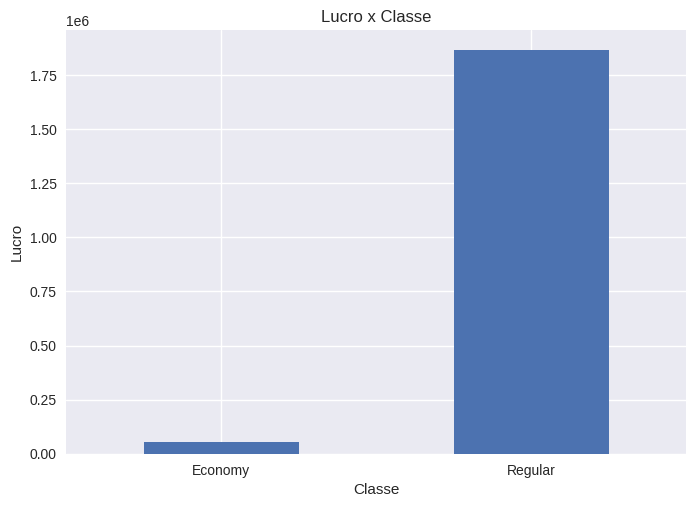

In [136]:
# Criando gráfico com o lucro por Classe
df_2008.groupby("Classe")["Lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal")

#### Vendas 2009

In [137]:
# Selecionando as vendas por ano (Troque pelo ano que você quiser)
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [138]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


Text(0, 0.5, 'Lucro')

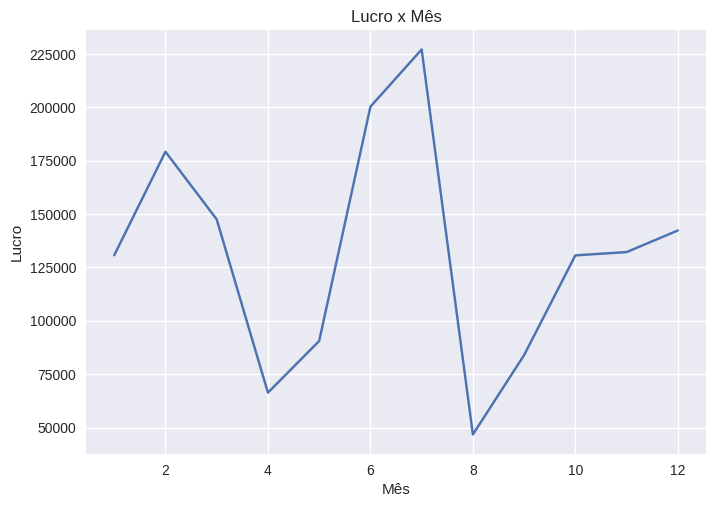

In [139]:
# Criando gráfico com o lucro por mês do ano selecionado
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro")

(array([0, 1, 2]),
 [Text(0, 0, 'Adventure Works'),
  Text(1, 0, 'Contoso'),
  Text(2, 0, 'Fabrikam')])

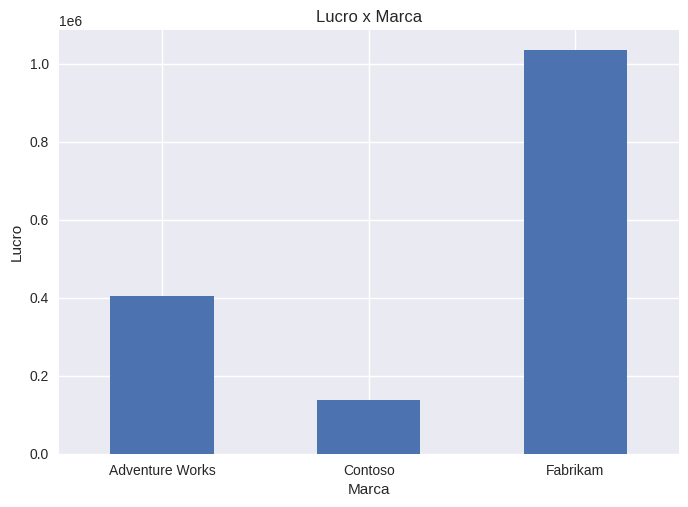

In [140]:
# Criando gráfico com o lucro por Marca
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal")

(array([0, 1]), [Text(0, 0, 'Economy'), Text(1, 0, 'Regular')])

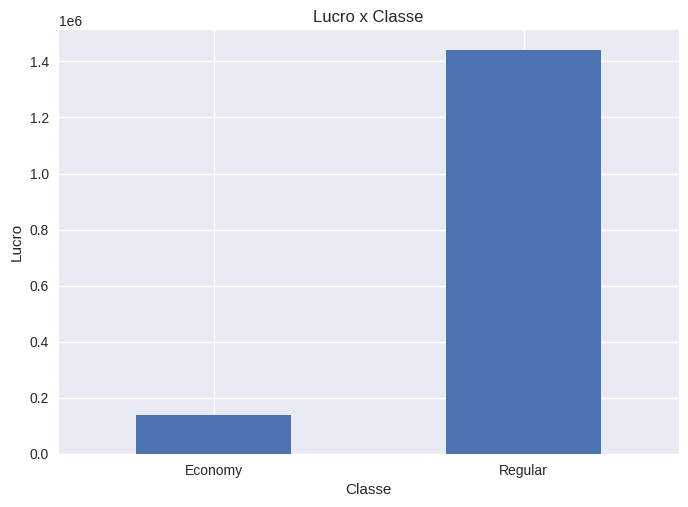

In [141]:
# Criando gráfico com o lucro por Classe
df_2009.groupby("Classe")["Lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal")

### Outras análises estatísticas sobre o tempo de envio

In [124]:
# Resumo estatístico dos dados da coluna "Tempo_envio"
df["Tempo_envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc98e177100>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc98e177640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc98e176e60>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc98e177b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc98e177e20>],
 'means': []}

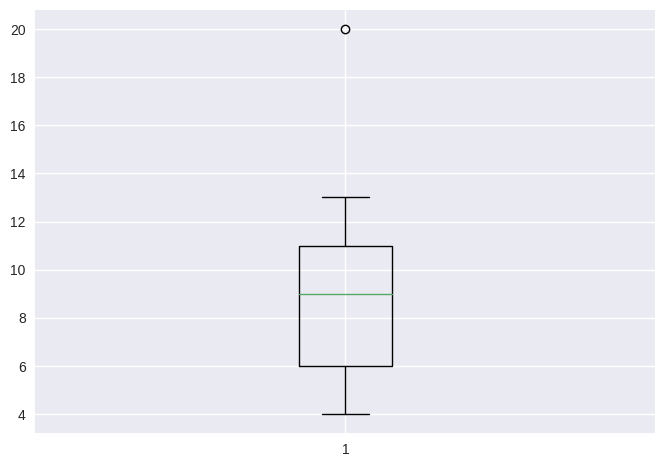

In [125]:
# Gráfico de Boxplot
plt.boxplot(df["Tempo_envio"])

(array([217., 137.,  70., 179., 115., 185.,   0.,   0.,   0.,   1.]),
 array([ 4. ,  5.6,  7.2,  8.8, 10.4, 12. , 13.6, 15.2, 16.8, 18.4, 20. ]),
 <BarContainer object of 10 artists>)

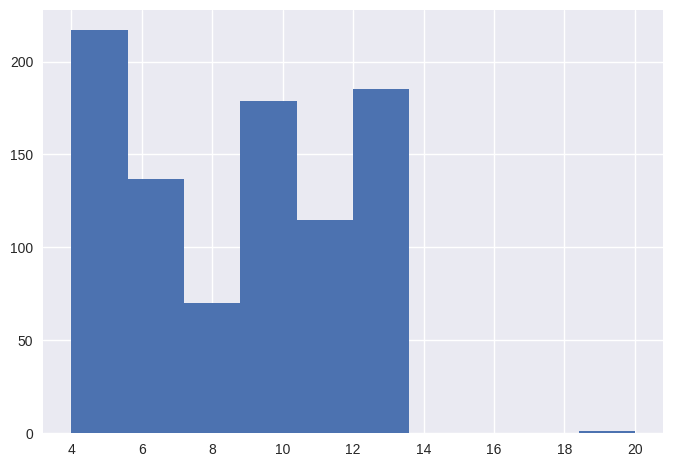

In [126]:
# Histograma
plt.hist(df["Tempo_envio"])

In [127]:
# Tempo Minimo de envio
df["Tempo_envio"].min()

4

In [128]:
# Tempo Máximo de envio
df["Tempo_envio"].max()

20

In [129]:
# Identificando o nosso valor extremo (Outlier)
df[df["Tempo_envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20
